In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#读取数据
df = pd.read_csv('titanic.csv')
# 删除重复行
df= df.drop_duplicates()
# 删除不相关的列
columns_to_drop = ['PassengerId', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop)
#处理异常值
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# 计算每列缺失值数量
missing_count = df.isnull().sum()
# 计算每列缺失值比例
missing_ratio = missing_count / len(df)
print(missing_ratio)


Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.209032
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.000000
dtype: float64


In [30]:
# 处理空缺数据
# 对 'Age' 列使用中位数填充
df['Age'] = df['Age'].fillna(df['Age'].median())
# 对 'Embarked' 列使用众数填充
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Age' in df.columns:
    df = df[df['Age'] % 1 == 0]

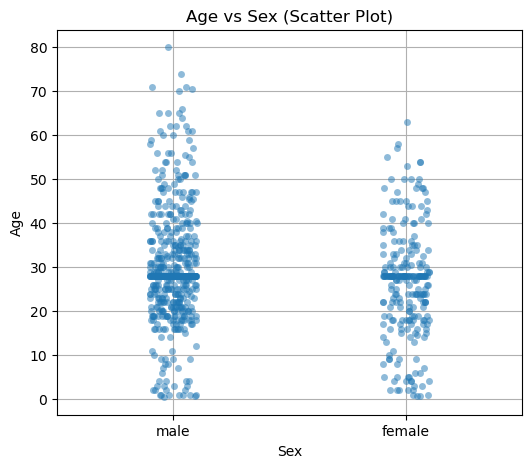

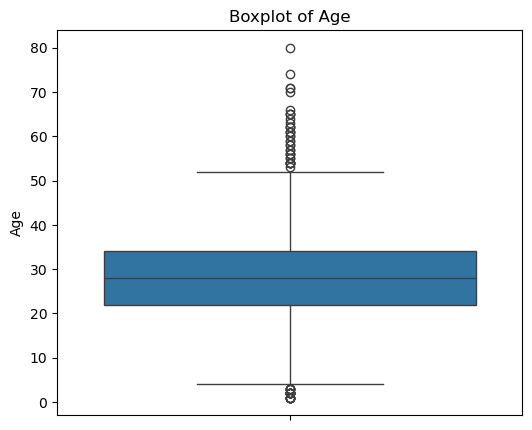

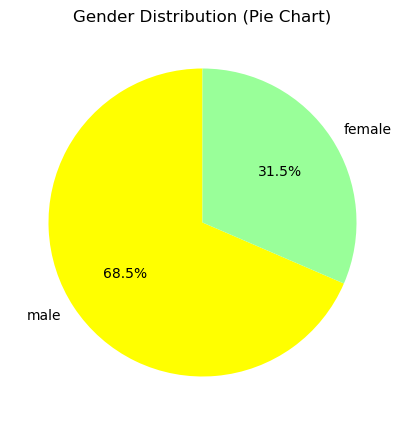

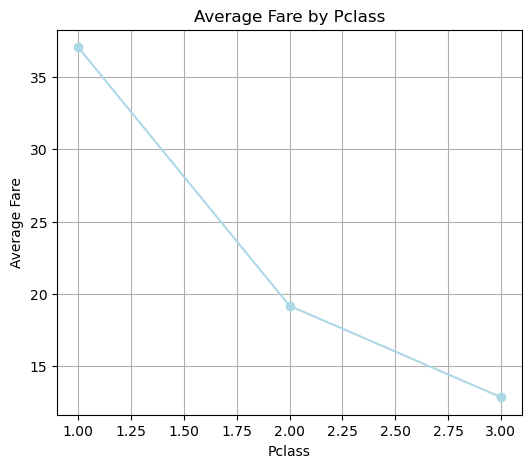

In [32]:
# 画散点图
plt.figure(figsize=(6, 5))#(宽度,高度)
sns.stripplot(x='Sex', y='Age', data=df_cleaned, jitter=True, alpha=0.5)#(x轴，y轴，数据来源，添加一些随机的抖动，这样可以避免数据点在分类轴上重叠,透明度)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age vs Sex (Scatter Plot)')
plt.grid(True)
#显示图形
plt.show()
# 绘制箱线图，帮助你查看某列数据的分布和异常值
if 'Age' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.boxplot(y=df['Age'])
    plt.title('Boxplot of Age')
    plt.show()
# 饼图 
# 计算每个性别的数量
sex_counts = df_cleaned ['Sex'].value_counts()
# 绘制饼图
plt.figure(figsize=(5, 5))
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FFFF00','#99ff99'])#(类型,每个扇形上显示其占总体的百分比,指定饼图的起始角度为 90 度,颜色)
plt.title('Gender Distribution (Pie Chart)')
plt.ylabel('')  # 去掉 ylabel
plt.show()
#折线图 
avg_fare_by_class = df_cleaned.groupby('Pclass')['Fare'].mean()
# 绘制折线图
plt.figure(figsize=(6, 5))
avg_fare_by_class.plot(kind='line', marker='o', color='#ADD8E6')#(折线图,圆形，颜色）
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.grid(True)#网格
plt.show()